# Measles

This data contains the overall and measles, mumps, and rubella immunization rates for schools across the United States. Each row corresponds to one school and includes a number of variables including the latitude, longitude, name, and vaccination rates.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

measles = pd.read_csv("data/measles.csv")
print(measles.shape)
measles.head(100)

(46411, 16)


,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Arizona,2018-19,Ochoa Elementary,Public,Tucson,Pima,NaN,29.0,100.0,-1.0,NaN,NaN,NaN,32.203475,-110.970546
96,97,Arizona,2018-19,Omega Alpha Academy,Charter,Douglas,Cochise,NaN,21.0,100.0,-1.0,NaN,NaN,NaN,31.348606,-109.532312
97,98,Arizona,2018-19,Orange Grove Elementary,Public,Somerton,Yuma,NaN,63.0,100.0,-1.0,NaN,NaN,NaN,32.588966,-114.658974
98,99,Arizona,2018-19,Our Lady Of Lourdes Academy,Private,Nogales,Santa Cruz,NaN,24.0,100.0,-1.0,NaN,NaN,4.17,31.356488,-110.918697


 DATA CLEANING

In [2]:
measles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46411 entries, 0 to 46410
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     46411 non-null  int64  
 1   state     46411 non-null  object 
 2   year      41730 non-null  object 
 3   name      46411 non-null  object 
 4   type      19237 non-null  object 
 5   city      29072 non-null  object 
 6   county    41253 non-null  object 
 7   district  0 non-null      float64
 8   enroll    33567 non-null  float64
 9   mmr       46411 non-null  float64
 10  overall   46411 non-null  float64
 11  xrel      94 non-null     object 
 12  xmed      12972 non-null  float64
 13  xper      6411 non-null   float64
 14  lat       44859 non-null  float64
 15  lng       44859 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usage: 5.7+ MB


In [3]:
measles

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.0,-1.0,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.0,-1.0,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.0,-1.0,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.0,-1.0,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.0,-1.0,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,44.910337,-89.571602


In [4]:
measles.tail(100)

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
46311,1416,Wisconsin,2018-19,Madison Waldorf,NaN,Madison,Dane,NaN,NaN,-1.0,8.0,NaN,NaN,46.0,43.047230,-89.493611
46312,1417,Wisconsin,2018-19,Carter's Christian Academy,NaN,Milwaukee,Milwaukee,NaN,NaN,-1.0,5.0,NaN,NaN,16.0,43.113270,-87.955911
46313,1418,Wisconsin,2018-19,Reedsville Hi,NaN,Reedsville,Manitowoc,NaN,NaN,-1.0,5.0,NaN,NaN,5.0,44.153842,-87.953091
46314,1419,Wisconsin,2018-19,Rio Mid/Hi,NaN,Rio,Columbia,NaN,NaN,-1.0,5.0,NaN,NaN,5.0,43.443107,-89.232970
46315,1420,Wisconsin,2018-19,Saint Croix Falls Hi,NaN,Saint Croix Falls,Polk,NaN,NaN,-1.0,5.0,NaN,NaN,5.0,45.407602,-92.633771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,44.910337,-89.571602


In [5]:
measles.shape

(46411, 16)

In [6]:
measles.isnull().sum()


index           0
state           0
year         4681
name            0
type        27174
city        17339
county       5158
district    46411
enroll      12844
mmr             0
overall         0
xrel        46317
xmed        33439
xper        40000
lat          1552
lng          1552
dtype: int64

In [7]:
measles.duplicated().sum()

0

In [8]:
measles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46411 entries, 0 to 46410
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     46411 non-null  int64  
 1   state     46411 non-null  object 
 2   year      41730 non-null  object 
 3   name      46411 non-null  object 
 4   type      19237 non-null  object 
 5   city      29072 non-null  object 
 6   county    41253 non-null  object 
 7   district  0 non-null      float64
 8   enroll    33567 non-null  float64
 9   mmr       46411 non-null  float64
 10  overall   46411 non-null  float64
 11  xrel      94 non-null     object 
 12  xmed      12972 non-null  float64
 13  xper      6411 non-null   float64
 14  lat       44859 non-null  float64
 15  lng       44859 non-null  float64
dtypes: float64(8), int64(1), object(7)
memory usage: 5.7+ MB


In [9]:
#removed the columns with extreme null values from the dataset for easier analysis
measles = measles.drop(columns = ["district", "xrel"])

In [10]:
measles

,index,state,year,name,type,city,county,enroll,mmr,overall,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46406,1511,Wisconsin,2018-19,Vance Creek Amish,NaN,Prairie Farm,Barron,NaN,-1.0,-1.0,NaN,NaN,45.232586,-91.983063
46407,1512,Wisconsin,2018-19,Walnut Grove Amish,NaN,Hillpoint,Sauk,NaN,-1.0,-1.0,NaN,NaN,43.423794,-90.112525
46408,1513,Wisconsin,2018-19,Wauwatosa Virtual Academy,NaN,Wauwatosa,Milwaukee,NaN,-1.0,-1.0,NaN,NaN,43.059360,-88.063521
46409,1514,Wisconsin,2018-19,Weston Elementary,NaN,Weston,Marathon,NaN,-1.0,-1.0,NaN,NaN,44.910337,-89.571602


## What types of schools have the highest overall and mmr vaccination rates?

In [11]:
# to find schools with the highest mmr vaccination rates

schools_mmr = measles.groupby("type")["mmr"].mean()

In [12]:
schools_mmr

type
BOCES           98.753191
Charter         68.598095
Kindergarten    94.262028
Nonpublic        9.342349
Private         58.683153
Public          89.412972
Name: mmr, dtype: float64

In [13]:
# Sort the schools with the highest mmr vaccination rates in ascending order
schools_mmr = measles.groupby("type")["mmr"].mean().sort_values(ascending = False)


In [20]:
schools_mmr

type
BOCES           98.753191
Kindergarten    94.262028
Public          89.412972
Charter         68.598095
Private         58.683153
Nonpublic        9.342349
Name: mmr, dtype: float64

In [21]:
# making it into a more structured type

schools_mmr = pd.DataFrame(schools_mmr)

In [22]:
schools_mmr

,mmr
type,
BOCES,98.753191
Kindergarten,94.262028
Public,89.412972
Charter,68.598095
Private,58.683153
Nonpublic,9.342349


In [23]:
# for easy visualization we use the first 1000 rows

new_measles_thousand = measles[:1000]
new_measles_thousand

,index,state,year,name,type,city,county,enroll,mmr,overall,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.00,-1.0,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.00,-1.0,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.00,-1.0,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.00,-1.0,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.00,-1.0,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Arizona,2018-19,Desert Sun Child Development - Kindergarten,Private,Chandler,Maricopa,21.0,80.95,-1.0,NaN,23.81,33.350180,-111.868639
996,997,Arizona,2018-19,Open Doors Community,Public,Marana,Pima,21.0,80.95,-1.0,NaN,9.52,32.454364,-111.216550
997,998,Arizona,2018-19,Payson Community Christian,Private,Payson,Gila,21.0,80.95,-1.0,NaN,14.29,34.232752,-111.307496
998,999,Arizona,2018-19,Synergy Public,Charter,Phoenix,Maricopa,117.0,80.34,-1.0,NaN,NaN,33.523602,-112.117517


<AxesSubplot: xlabel='mmr', ylabel='type'>

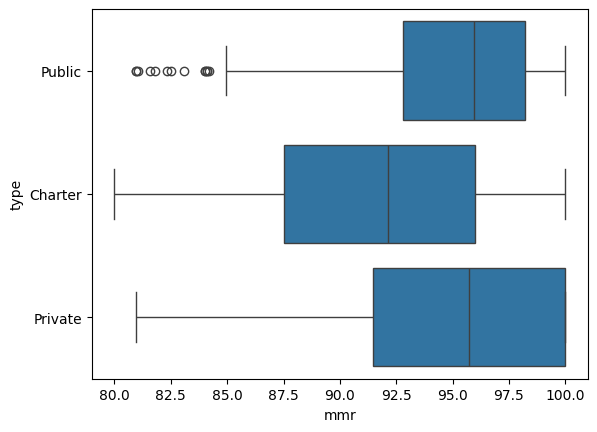

In [24]:
sns.boxplot(data=new_measles_thousand, x="mmr", y="type")

## This boxplot visualizes the distribution of MMR (Measles, Mumps, and Rubella) vaccination rates across different types of schools, namely Public, Charter and Private.

The box plot provides insights into the central tendency, spread, and presence of outliers in the vaccination rates for each school type. 
1. According to the boxplot visualization, public, charter and prvate school types are left skewed distribution whcih translates to the mean vaccination rate is less than the median vaccination rate for these school types.
2. Presence of outliers below Q1 in public school type shows a variation in vaccination rates within this categories.
3. For Private school that have a perfectly left skewed distribution,  it indicates that most private schools have relatively high MMR vaccination rates.


RECOMENDATIONS:
1. Targeted interventions and educational campaigns can be implemented to address barriers to vaccination and encourage higher compliance with vaccination requirements among schools with lower rates.
2. Collaboration between schools, public health authorities, and community organizations can facilitate the sharing of best practices and resources to improve vaccination rates across the board.
3. Private schools can look into implementing clear and consistent vaccination policies that prioritize the health and safety of students. 




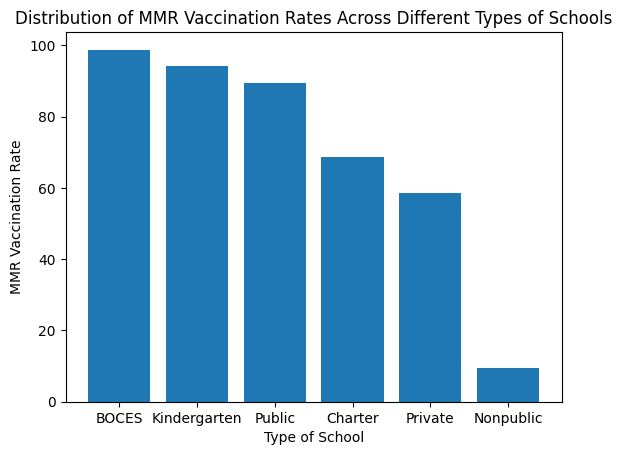

In [23]:
plt.bar(schools_mmr.index, schools_mmr["mmr"])
plt.xlabel("Type of School")
plt.ylabel("MMR Vaccination Rate")
plt.title("Distribution of MMR Vaccination Rates Across Different Types of Schools")
plt.show()

The fact that BOCES (Boards of Cooperative Educational Services) schools have the highest MMR (Measles, Mumps, and Rubella) vaccination rates among different types of schools could be influenced by several factors like:
1. These programs may have specific vaccination requirements or policies in place, leading to higher compliance rates.
2. BOCES are trusted and are known to provide shared educational programs and services to school districts so the high MMR vaccination rate could be as as a result of strict guideline put in place to ensure adherence to vaccination as a requiremnt in order to maintain their known credibility among school districts.


In [24]:
# to find schools to with the highest overall vaccination rate

schools_overall = measles.groupby("type")["overall"].mean().sort_values(ascending = False)
schools_overall


type
Kindergarten    87.811782
Public          53.312202
Private         22.959273
BOCES           -1.000000
Charter         -1.000000
Nonpublic       -1.000000
Name: overall, dtype: float64

In [25]:
schools_overall = pd.DataFrame(schools_overall)
schools_overall

,overall
type,
Kindergarten,87.811782
Public,53.312202
Private,22.959273
BOCES,-1.000000
Charter,-1.000000
Nonpublic,-1.000000


## Checking the distribution rates across different types of schools.

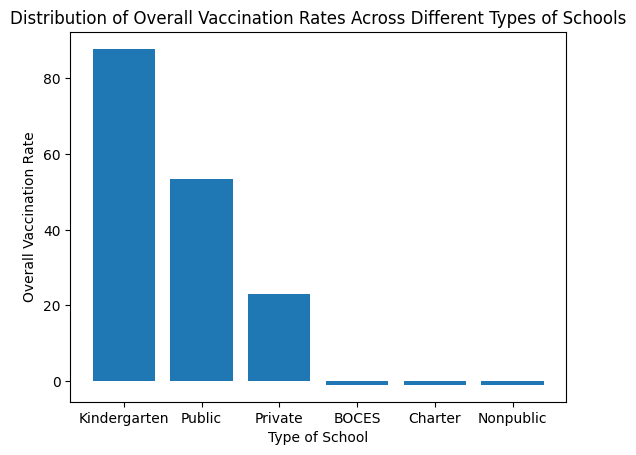

In [26]:
plt.bar(schools_overall.index, schools_overall["overall"])
plt.xlabel("Type of School")
plt.ylabel("Overall Vaccination Rate")
plt.title("Distribution of Overall Vaccination Rates Across Different Types of Schools")
plt.show()

The analysis of overall vaccination rates across various school types has yielded interesting insights into the landscape of vaccination coverage. One notable observation is the consistently high overall vaccination rates in Kindergarten schools. 
Some factors that may conytribute to this trend is:
1. Kindergartens are known for implementing stringent vaccination policies, ensuring that enrolled students have up-to-date vaccinations
2. Public health campaigns and educational initiatives may contribute to increased awareness, encouraging parents to prioritize vaccinations for their children.
3.  Parents sending their children to Kindergarten are likely more informed about the importance of vaccinations for disease prevention. 

### BROAD ANALYSIS ON SCHOOL TYPE DISTRIBUTION ON OVERALL AND MMR VACCINATION AND INSIGHTS
The analysis of "schools_overall" and "schools_mmr" bar charts reveals intriguing patterns in vaccination rates across various school types. BOCES (Board of Cooperative Educational Services) emerges as a standout performer, excelling in both overall and MMR vaccination rates. Kindergarten schools, leading in "schools_overall," closely trail BOCES in "schools_mmr," suggesting a prioritization of MMR vaccinations, contributing to their high overall vaccination rates. This alignment implies a shared commitment to comprehensive vaccination practices between BOCES and Kindergarten schools. Public and charter schools demonstrate notable rankings in both categories, indicating strong adherence to vaccination protocols. Conversely, private schools, while respectable in "schools_overall," show lower representation in "schools_mmr," suggesting potential variations in MMR vaccination practices. Non-public schools consistently lag in both charts.

### RECCOMENDATIONS:
1. Launch public awareness campaigns to educate parents, guardians, and school staff about the importance of vaccinations. Provide clear information on the benefits of overall vaccination and the specific significance of MMR vaccines.
2. Implement targeted interventions for non-public schools to improve their overall and MMR vaccination rates. This can be done by Collaborating with non-public schools to understand and address specific challenges or barriers to vaccination.
3. Kindergarten schools have achieved impressive vaccination rates, demonstrating their commitment to protecting students' health. These schools should share their effective strategies with others to promote vaccination and public health awareness
4. Kindergarteen should consider expanding their successful vaccination programs to other educational institutions to maximize their impact and protect more students from serious diseases.
5. Overall vaccination rates among BOCES, charter and nonpublic schools are significantly low in contrast to MMR vaccinations, so there is need for targeted interventions or further investigation to understand and address the factors contributing to these lower rates in BOCES schools.




# 📊 Visualize: Create a plot that visualizes the overall and mmr vaccination rates for the ten states with the highest number of schools.

In [27]:
measles_states = measles.groupby("state")["name"].count().sort_values(ascending = False)

In [28]:
#first 10 states with the highest number of schools 
first_ten = measles_states[:10]
first_ten


state
California        8066
New York          3645
Illinois          3574
Florida           2242
New Jersey        2149
Ohio              2137
Michigan          1899
North Carolina    1767
Pennsylvania      1635
Washington        1567
Name: name, dtype: int64

In [29]:
first_ten= pd.DataFrame(first_ten)

In [30]:
measles.loc[:10]

,index,state,year,name,type,city,county,enroll,mmr,overall,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,51.0,100.0,-1.0,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,22.0,100.0,-1.0,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,85.0,100.0,-1.0,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,60.0,100.0,-1.0,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,43.0,100.0,-1.0,2.33,2.33,33.495620,-112.224722
5,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,36.0,100.0,-1.0,NaN,NaN,33.435319,-112.116828
6,7,Arizona,2018-19,All Aboard Charter,Charter,Phoenix,Maricopa,24.0,100.0,-1.0,NaN,4.17,33.523322,-112.133753
7,8,Arizona,2018-19,Amerischools Academy - Yuma South Campus,Charter,Yuma,Yuma,22.0,100.0,-1.0,NaN,NaN,32.690013,-114.623427
8,9,Arizona,2018-19,Arizona Cultural Academy,Private,Phoenix,Maricopa,26.0,100.0,-1.0,NaN,NaN,33.375616,-111.992910
9,10,Arizona,2018-19,Arizona Desert Elementary,Public,San Luis,Yuma,78.0,100.0,-1.0,NaN,NaN,32.500611,-114.781004


In [31]:
list(first_ten.index)

['California',
 'New York',
 'Illinois',
 'Florida',
 'New Jersey',
 'Ohio',
 'Michigan',
 'North Carolina',
 'Pennsylvania',
 'Washington']

A function "first_ten_filter" that takes a row as input and checks whether the value in the "state" column of that row is among the top ten states specified in the "list first_ten"

In [32]:

def first_ten_filter(row):
    first_ten = ['California',
 'New York',
 'Illinois',
 'Florida',
 'New Jersey',
 'Ohio',
 'Michigan',
 'North Carolina',
 'Pennsylvania',
 'Washington']
    if row in first_ten:
        return True
    return False
# mask to filter the dataframe to include only the rows related to the top ten states.
mask = measles["state"].apply(first_ten_filter)

<function matplotlib.pyplot.show(close=None, block=None)>

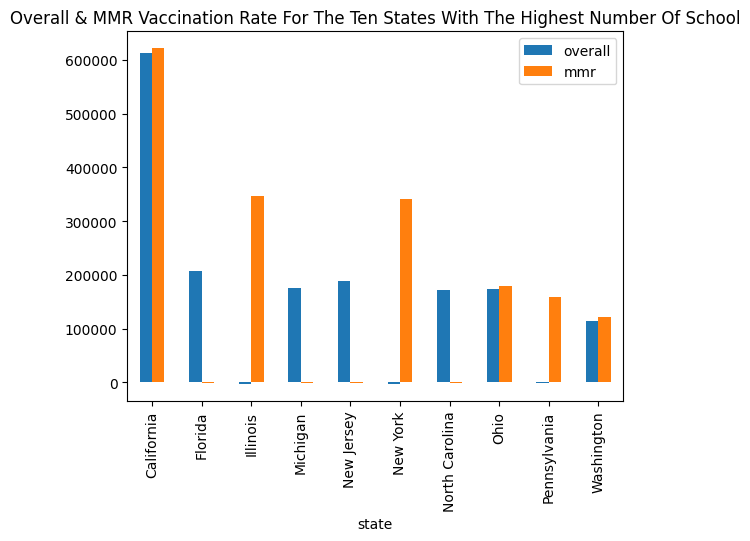

In [33]:
measles[mask].groupby("state")[["overall", "mmr"]].sum().plot(kind="bar")
plt.title("Overall & MMR Vaccination Rate For The Ten States With The Highest Number Of School")
plt.show

1. The analysis of the Overalla and MMR vaccination rate for the ten states with the highest number of schools shows that California has the highest number of vaccination rates for the both overall and MMR vaccinations, indicating their significant vaccination efforts.
2. States like Florida, Michigan, New Jersey and North Carolina are seen to have extremely low MMR vaccination rates with room for improvements and review of plocies and backed up by the  rate of overall vaccination numbers.
3. The somewhat reverse is the case in Illinios, Mew York and Pennsylvania as they are seen to have aa trying rate of mmr vaccination and an extremly low overall vaccination rate.
4. States like Ohio and Washington can work on strategies to increase their overall and mmr vaccination rates.
5. California has hsown to have successful vaccination programs that others can learn from.


# 🔎 Analyze: Does location affect the vaccination percentage of a school?

The scatter plots reveals the geographical distribution of MMR and Overall vaccination rates across different latitudes and longitudes. Analysis of the plot suggests variations in vaccination rates based on geographic location.

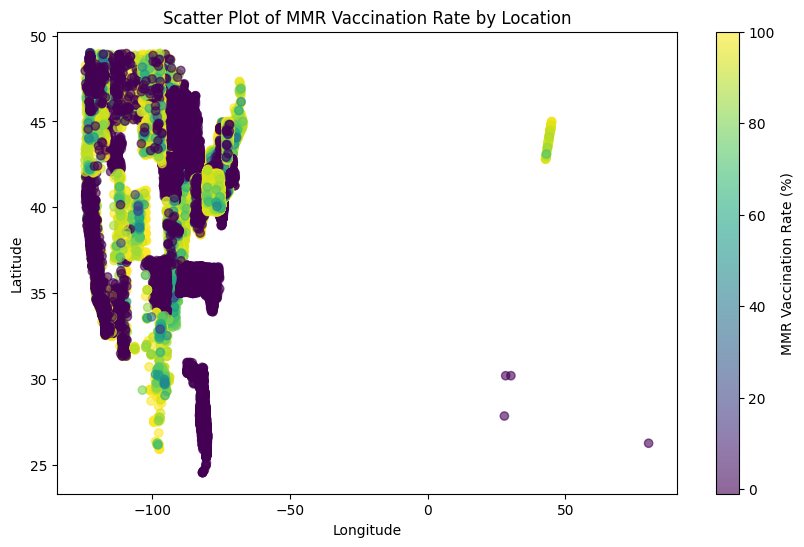

In [28]:
# Scatter plot for MMR vaccination rate against latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(measles['lng'], measles['lat'], c=measles['mmr'], cmap='viridis', alpha=0.6)
plt.colorbar(label='MMR Vaccination Rate (%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of MMR Vaccination Rate by Location')
plt.show()

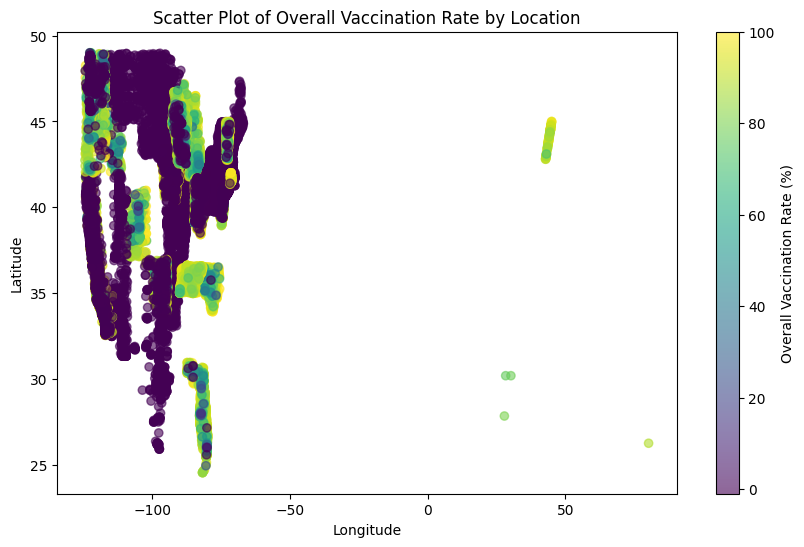

In [27]:
# Scatter plot for Overall vaccination rate against latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(measles['lng'], measles['lat'], c=measles['overall'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Overall Vaccination Rate (%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Overall Vaccination Rate by Location')
plt.show()

# 🔎 Percentage of Students Exempted from Vaccination

In [14]:
exempted_columns = ['xmed', 'xper']

In [15]:
exempted_df = measles[exempted_columns]
exempted_df


,xmed,xper
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,2.33,2.33
...,...,...
46406,NaN,NaN
46407,NaN,NaN
46408,NaN,NaN
46409,NaN,NaN


In [16]:
exempted_df_percentage = exempted_df.mean() * 100

In [17]:
print("Percentage of Students Exempted:")
print(exempted_df_percentage)


Percentage of Students Exempted:
xmed    310.243393
xper    692.897767
dtype: float64


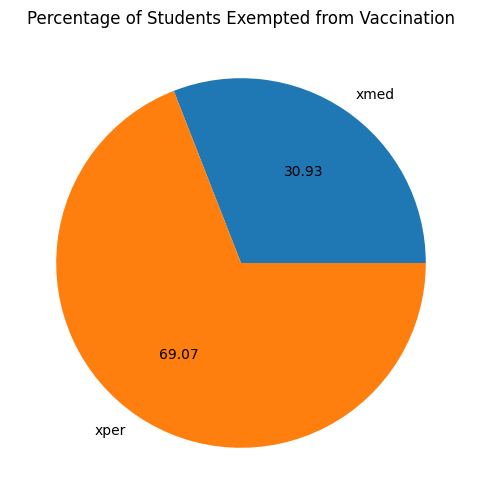

In [24]:
plt.figure(figsize=(10, 6))
exempted_df_percentage.plot(kind='pie', autopct ="%.2f")
plt.title('Percentage of Students Exempted from Vaccination')
plt.show()

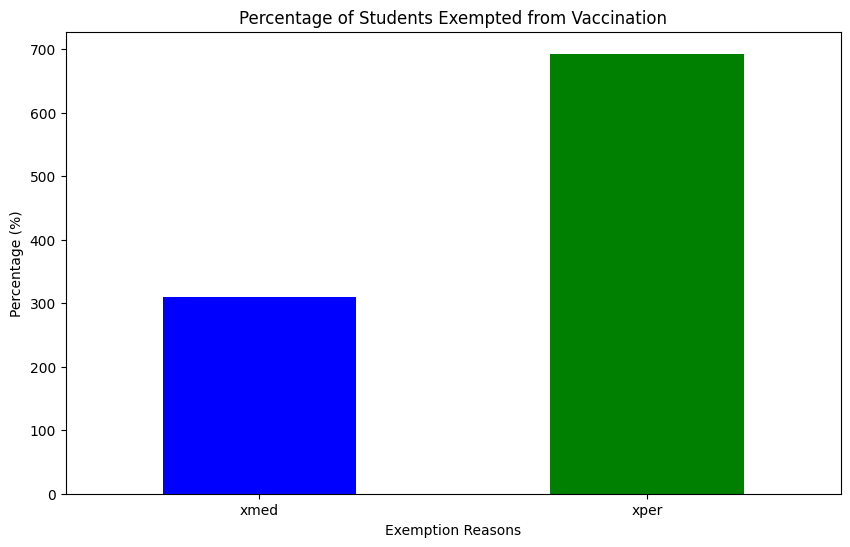

In [20]:
plt.figure(figsize=(10, 6))
exempted_df_percentage.plot(kind='bar', color=['blue', 'green'])
plt.title('Percentage of Students Exempted from Vaccination')
plt.xlabel('Exemption Reasons')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

This chart visualizes the average percentage of students exempted for medical and personal reasons. Some insights taht can be derived is:
1. Exemption from vaccination due to personal reasons is more prevalent which could suggest that vaccination policies are lenient towards non-medical exemptions, which could be a concern for public health.
2. Understanding the reasons behind exemptions can help in designing targeted communication and educational campaigns to address misconceptions or fears about vaccines.


RECOMMENDATIONS: 
1. If personal exemptions are high, it may be worth reviewing and potentially tightening exemption policies to ensure they are based on legitimate medical grounds.
2. mplement awareness campaigns to educate the public about the importance of vaccinations and the risks associated with not vaccinating children.
3.  Work with healthcare providers to ensure they have the resources and information needed to discuss the importance of vaccinations with patients and address any concerns.
4. We can use more data analytics to understand the demographics and regions with higher exemption rates and tailor interventions to those specific areas.



## Data Dictionary

|Column    |Explanation                                                              |
| -------- | ----------------------------------------------------------------------- |
|index     | Index ID                                                                |
|state     | School's state                                                          |
|year      | School academic year                                                    |
|name      | School name                                                             |
|type      | Whether a school is public, private, charter                            |
|city      | City                                                                    |
|county    | County                                                                  |
|district  | School district                                                         |
|enroll    | Enrollment                                                              |
|mmr       | School's Measles, Mumps, and Rubella (MMR) vaccination rate             |
|overall   | School's overall vaccination rate                                       |
|xrel      | Percentage of students exempted from vaccination for religious reasons  |
|xmed      | Percentage of students exempted from vaccination for medical reasons    |
|xper      | Percentage of students exempted from vaccination for personal reasons   |

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What types of schools have the highest overall and mmr vaccination rates?
- 📊 **Visualize**: Create a plot that visualizes the overall and mmr vaccination rates for the ten states with the highest number of schools.
- 🔎 **Analyze**: Does location affect the vaccination percentage of a school?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for a public health organization. The organization has a problem: this year, the overall vaccination rate information for schools is not yet available. To gain an initial idea of the rates, your manager has asked you whether it is possible to use other data to predict the overall vaccination rate of a school. This includes such information as the mmr vaccination rate, the location, and the type of school. Your manager also wants to know how reliable your predictions are.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._